In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [4]:


data = pd.read_csv('diabetes.csv')


In [6]:


print("Shape of the dataset : ",data.shape)

Shape of the dataset :  (768, 9)


In [5]:


data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:


data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.isnull().values.any()

False

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'correlation matrix ')

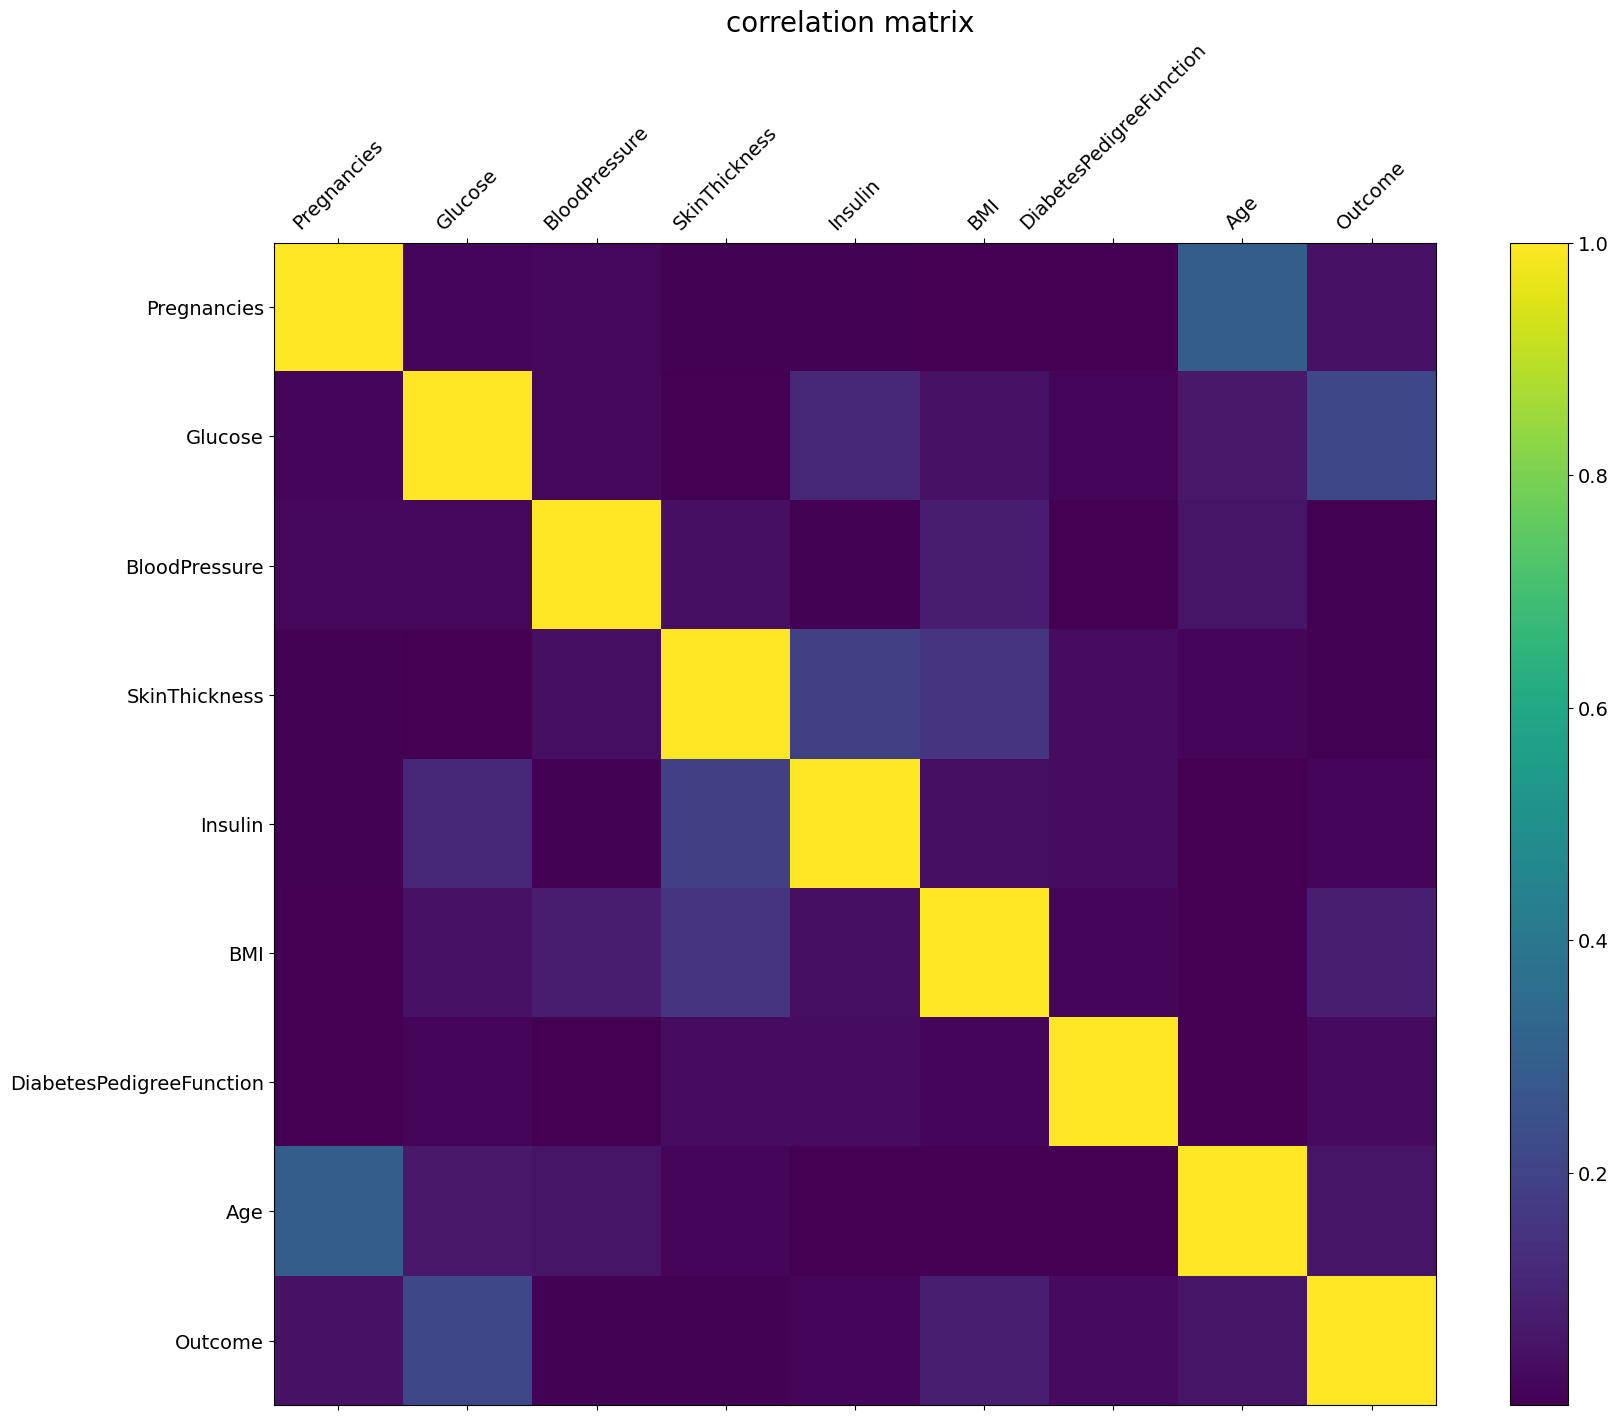

In [11]:
fig = plt.figure(figsize = (19,15))
plt.matshow(data.corr()**2,fignum = fig.number)
plt.xticks(range(data.shape[1]),data.columns,fontsize = 14, rotation = 45)
plt.yticks(range(data.shape[1]),data.columns,fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title("correlation matrix ",fontsize =20)

In [12]:
print("Here,\n  0 represents No Diabetes\n  1 represents the presences of diabetes")

data['Outcome'].value_counts()


Here,
  0 represents No Diabetes
  1 represents the presences of diabetes


0    500
1    268
Name: Outcome, dtype: int64

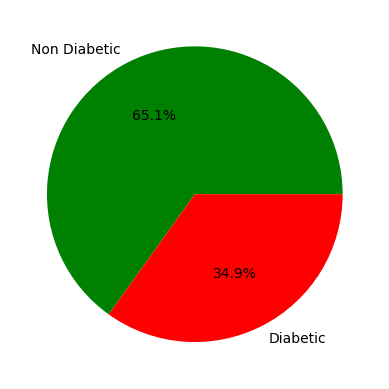

In [13]:
slices_hours = data['Outcome'].value_counts()
activities = ['Non Diabetic', 'Diabetic']
colors = ['g', 'r']
plt.pie(slices_hours, labels=activities, colors=colors, autopct='%.1f%%')
plt.show()

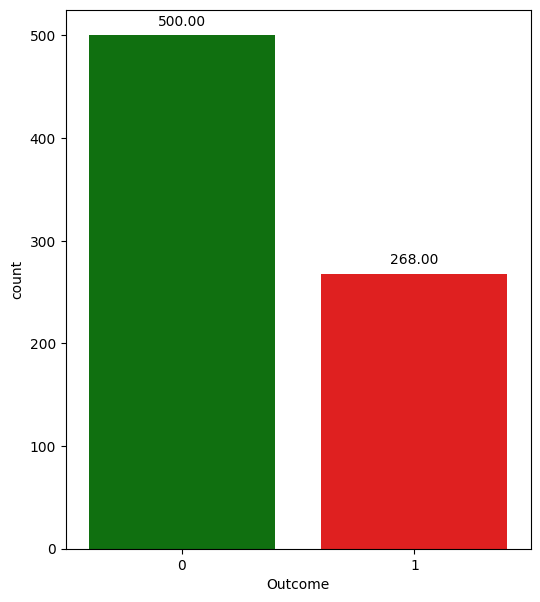

In [14]:
rcParams['figure.figsize'] = 6,7
activities = ['Non Diabetic', 'Diabetic']
ax = sns.countplot(x='Outcome',data=data,palette=["green", "red"],)
for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'),
            (p.get_x()+ p.get_width() / 2., p.get_height()),
            ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

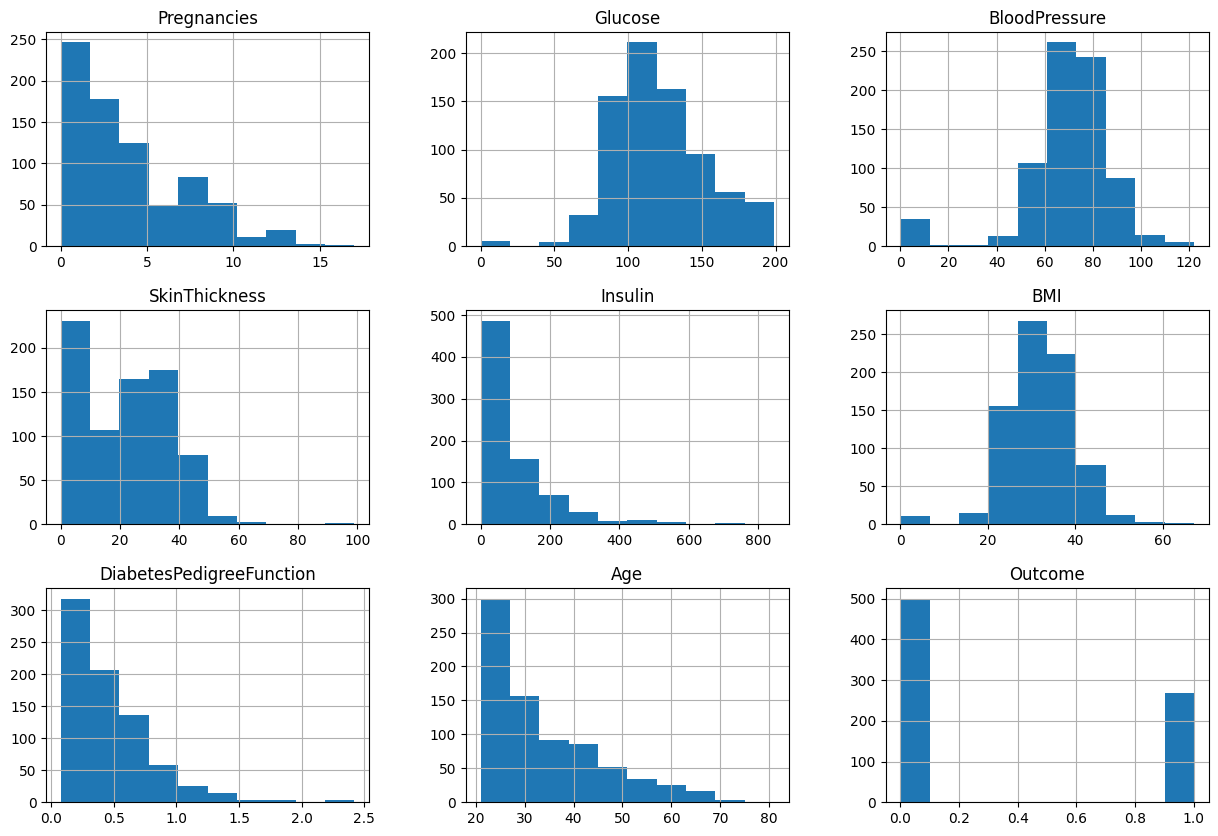

In [15]:
rcParams['figure.figsize'] = 15,10
data.hist()

In [16]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [17]:


X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

In [18]:
print(X)
print("========================================================")
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X)


StandardScaler()

In [20]:
Standardrized_data = scaler.transform(X)

In [21]:
print(Standardrized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X = Standardrized_data
Y = data['Outcome']

print(X)
print('\n==================================================================\n')
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [23]:

from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [24]:
X_train.shape


(614, 8)

In [25]:
X_test.shape

(154, 8)

In [26]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


X_train

array([[-1.13796489, -0.07971099, -3.5556072 , ...,  0.02825037,
        -0.98159708, -0.7885233 ],
       [ 0.64067858, -0.52091877,  0.02549599, ..., -0.17184452,
        -1.03823795,  0.31879426],
       [-0.84152431,  2.12632792, -0.48609018, ..., -0.25938604,
        -0.21545477,  2.19271628],
       ...,
       [ 2.12288146, -1.15121561,  0.23013046, ..., -0.25938604,
        -0.50760242,  0.14843771],
       [ 0.04779742, -0.30031488,  0.43476492, ...,  0.90366551,
        -0.69839272,  0.40397253],
       [-1.13796489, -1.11970076, -0.07682125, ...,  0.45345201,
        -0.69243053, -0.70334503]])

In [27]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:


knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, Y_train)
    knn_scores.append(knn_classifier.score(X_test, Y_test))


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

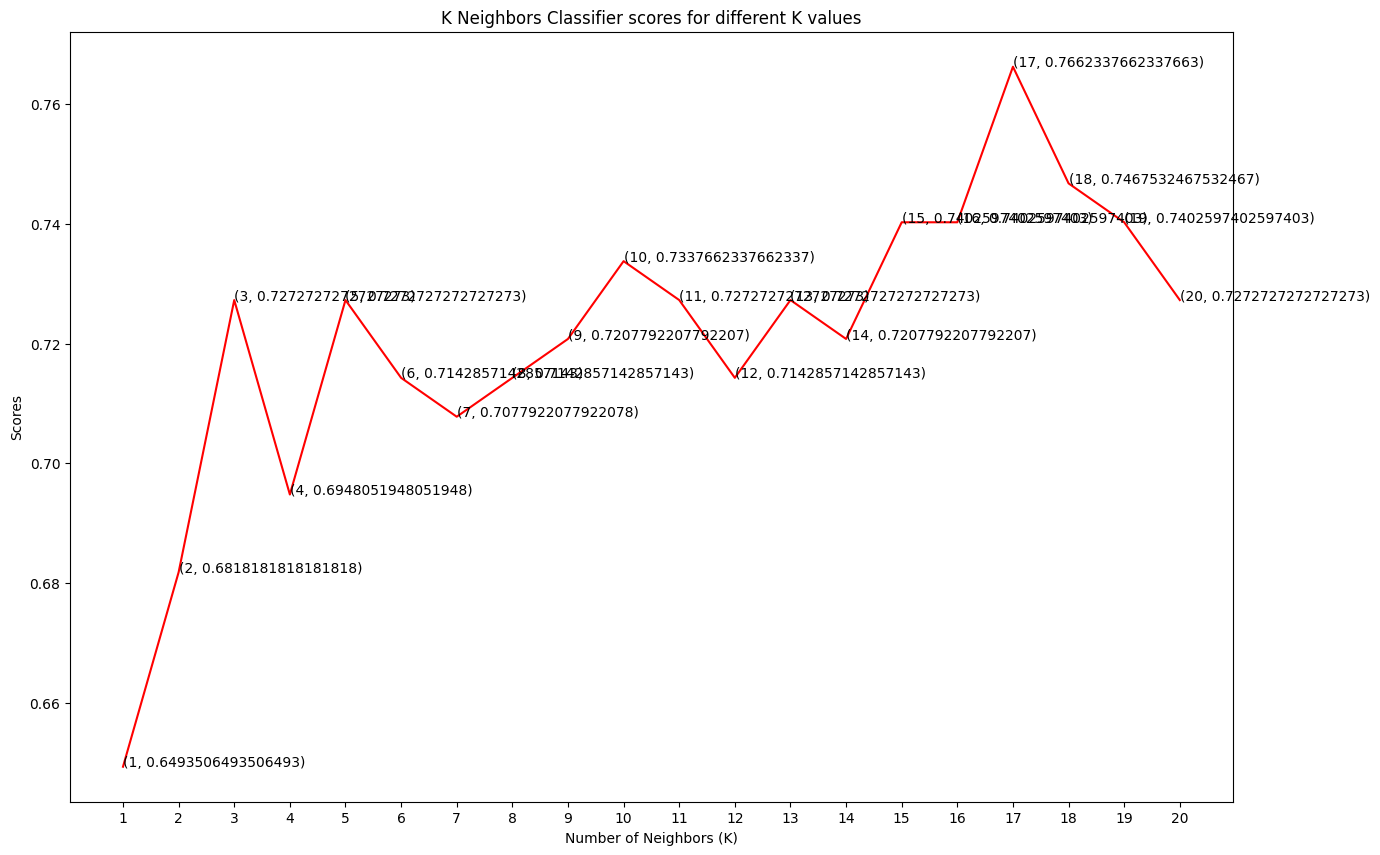

In [29]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [31]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[16]*100, 17))

The score for K Neighbors Classifier is 76.62337662337663% with 17 nieghbors.


In [30]:


svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, Y_train)
    svc_scores.append(svc_classifier.score(X_test, Y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

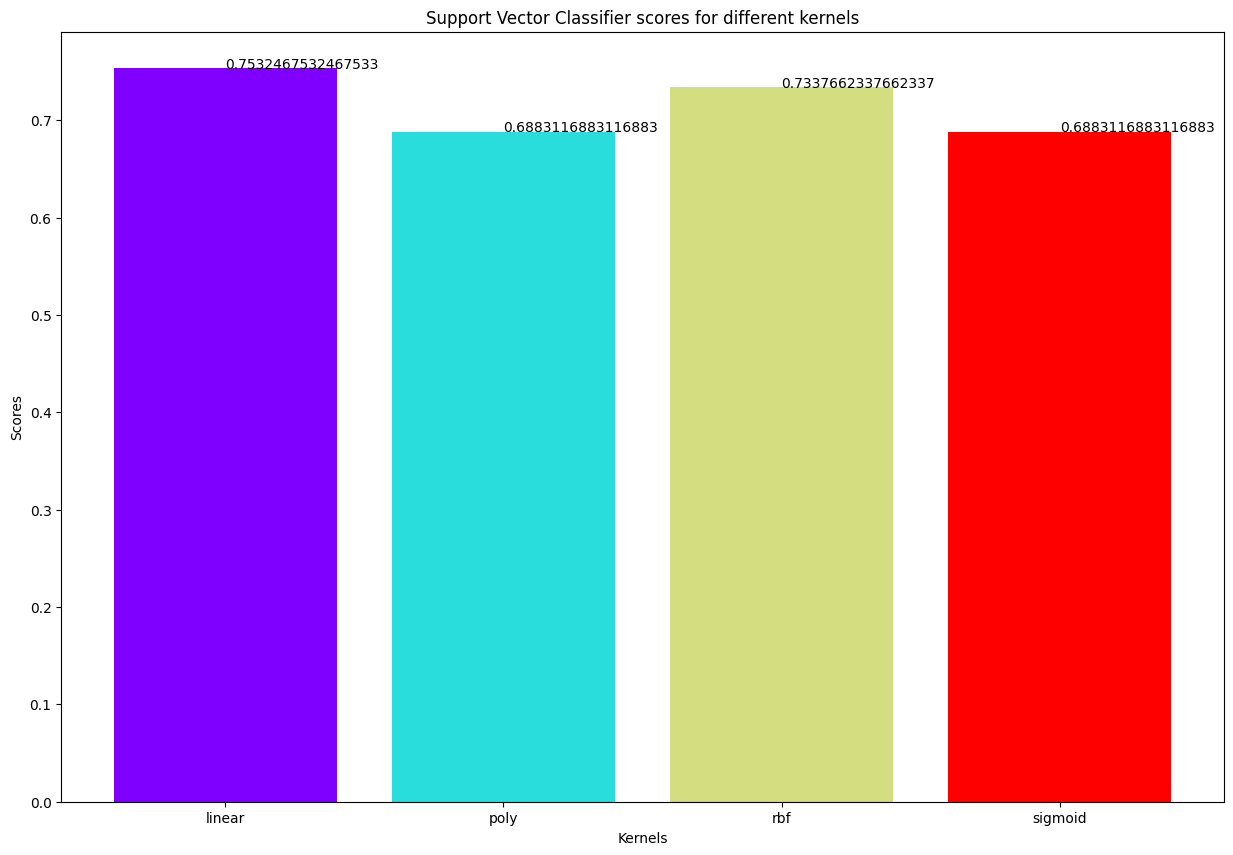

In [32]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')


In [33]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 75.32467532467533% with linear kernel.


In [34]:



input_data=(4,110,92,0,0,37.6,0.191,30)


input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)


std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=knn_classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
     print('the person is not diabetic')
else:
    print('the person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
the person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
